**The scenario will be as follows**
1-Importing the libraries
2-Visualizing Image Augmentation
3-

Importing the libraries

In [60]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

**Create the Neural Network model**

In [44]:
#direction of data
train_dir = 'C:\\Users\\DELL-G5\\Downloads\\archive (1)\\Rock-Paper-Scissors\\train'
test_dir = 'C:\\Users\\DELL-G5\\Downloads\\archive (1)\\Rock-Paper-Scissors\\test'
VALIDATION_DIR='C:\\Users\\DELL-G5\\Downloads\\archive (1)\\Rock-Paper-Scissors\\validation'


In [3]:
train_dir

'C:\\Users\\DELL-G5\\Downloads\\archive (1)\\Rock-Paper-Scissors\\train'

Visualizing Image Augmentation

In [4]:
sample_generator = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip = True,
                                      vertical_flip = True,
                                      rotation_range = 90,
                                      height_shift_range = 0.2,
                                      width_shift_range = 0.2)
sample_images = sample_generator.flow_from_directory(directory = r'C:\\Users\\DELL-G5\\Downloads\\archive (1)\Rock-Paper-Scissors\train',
                                                    target_size = (300, 300),
                                                    color_mode = 'rgb',
                                                    class_mode = None,
                                                    batch_size = 1,
                                                    shuffle = True,
                                                    seed = 42)


Found 2520 images belonging to 3 classes.


In [5]:
plt.figure(figsize = (10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [6]:
pic = load_img("C:\\Users\DELL-G5\\Downloads\\archive (1)\\Rock-Paper-Scissors\\train\paper\\paper07-108.png")
pic.getpixel

<bound method Image.getpixel of <PIL.Image.Image image mode=RGB size=300x300 at 0x244B5526A00>>

In [7]:
pic_array = img_to_array(pic)
pic_array.shape

(300, 300, 3)

In [8]:
plt.figure(figsize = (10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

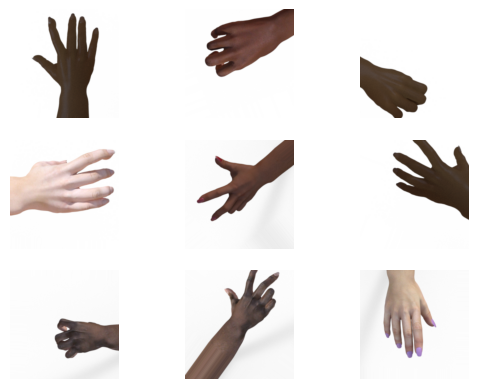

In [9]:
#show random imgs
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = sample_images.next()[0]
    plt.imshow(img)
    plt.axis('off')

Creating Generators

In [10]:
train_generator = ImageDataGenerator(rescale = 1./255,   #imgs data scaling
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    rotation_range = 90,
                                    height_shift_range = 0.2,
                                    width_shift_range = 0.2,
                                    zoom_range = 0.2)
test_generator = ImageDataGenerator(rescale = 1./255,
                                    validation_split = 0.7)


In [11]:
train_images = train_generator.flow_from_directory(train_dir,
                                                  target_size=(150, 150),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  batch_size = 32,
                                                  shuffle = True,
                                                  seed = 42,
                                                  subset = 'training')
val_images = test_generator.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=32,
                                                shuffle=True,
                                                seed=42,
                                                subset='training')
test_images = test_generator.flow_from_directory(test_dir,
                                                target_size = (150, 150),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=32,
                                                shuffle=False,
                                                seed=42,
                                                subset='validation')

Found 2520 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Found 258 images belonging to 3 classes.


Training

In [12]:
inputs = tf.keras.Input(shape = (150, 150 ,3))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

In [13]:
model = tf.keras.Model(inputs, outputs)

In [18]:
model.compile(optimizer ='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_images,
                    validation_data = val_images,
                    epochs = 100,
                    callbacks = [
                        tf.keras.callbacks.EarlyStopping(
                        monitor = 'val_loss',
                        patience = 5,
                        restore_best_weights = True
                        )
                    ]
                    )

Epoch 1/100
79/79 [==============================] - 63s 782ms/step - loss: 0.1115 - accuracy: 0.9587 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 2/100
79/79 [==============================] - 59s 744ms/step - loss: 0.1052 - accuracy: 0.9651 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3/100
79/79 [==============================] - 60s 764ms/step - loss: 0.0981 - accuracy: 0.9639 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 4/100
79/79 [==============================] - 62s 779ms/step - loss: 0.1237 - accuracy: 0.9560 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 5/100
79/79 [==============================] - 61s 768ms/step - loss: 0.1056 - accuracy: 0.9619 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/100
 3/79 [>.............................] - ETA: 59s - loss: 0.1326 - accuracy: 0.9583 

KeyboardInterrupt: 

In [19]:
acc = model.evaluate(test_images, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 97.29%


In [20]:
predictions = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1, 2])
clr = classification_report(test_images.labels, predictions, labels=[0, 1, 2], target_names=["Paper", "Rock", "Scissors"])

9/9 [==============================] - 2s 192ms/step


Text(0.5, 1.0, 'Confusion Matrix')

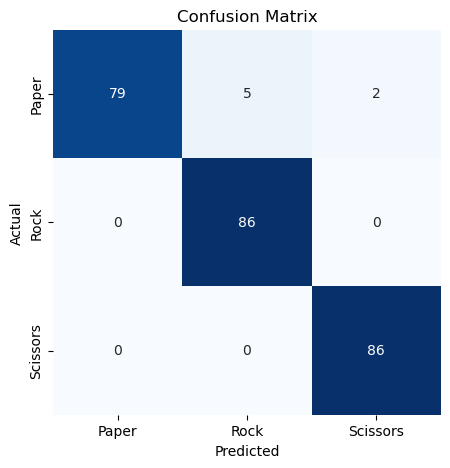

In [21]:
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks = [0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

**Create the svm model**

In [24]:
pip install opencv-python

     -------------------------------------- 35.6/35.6 MB 503.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import glob
import cv2
import os
print(os.listdir("C:\\Users\\DELL-G5\\Downloads\\archive (1)\\Rock-Paper-Scissors"))

['Rock-Paper-Scissors', 'test', 'train', 'validation']


In [38]:
from tensorflow.keras.preprocessing import image
train_images = []
train_labels = []
images = os.listdir(train_dir)
for key in images:
    for img in os.listdir(train_dir+"/"+key):
        test_image =image.load_img(train_dir+"/"+key+"/"+img,target_size=(150,150))
        test_image=image.img_to_array(test_image)
        test_image = test_image[:,:,0]
        test_image = np.reshape(test_image, (150,150))
        train_images.append(test_image.flatten())
        train_labels.append(key)

In [40]:
images = os.listdir(test_dir)
for key in images:
    for img in os.listdir(test_dir+"/"+key):
        test_image =image.load_img(test_dir+"/"+key+"/"+img,target_size=(150,150))
        test_image=image.img_to_array(test_image)
        test_image = test_image[:,:,0]
        test_image = np.reshape(test_image, (150,150))
        train_images.append(test_image.flatten())
        train_labels.append(key)

In [42]:
labels_key = ["paper", "scissors", "rock"]
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
labels = [labelencode.fit_transform(labels_key)]
labels = tf.keras.utils.to_categorical(labels, 3)


In [41]:
np.shape(train_images)

(2892, 22500)

In [45]:
import os
images = os.listdir(VALIDATION_DIR)
y_pred= list()
y_true = []
for i in images:
    for key in labels_key:
        if key in i:
            y_true.append(key)
y_true_hot = [labelencode.fit_transform(y_true)]
y_true_hot = tf.keras.utils.to_categorical(y_true_hot, 3)

In [49]:
test_images = []
for i in images:
    location = "C:\\Users\\DELL-G5\\Downloads\\archive (1)\\Rock-Paper-Scissors\\validation/"+i
    test_image = image.load_img(location,target_size=(150,150))
    test_image=image.img_to_array(test_image)
    test_image = test_image[:,:,0]
    test_image = np.reshape(test_image, (150,150,1))
    test_images.append(test_image)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [53]:
del train_images, train_labels

In [61]:
for i in [0.1, 1, 10, 100]:
    poly = svm.SVC(kernel='poly', degree=3, C=i).fit(X_train, y_train)
    poly_pred = poly.predict(X_test)
    poly_accuracy = accuracy_score(y_test, poly_pred)
    poly_f1 = f1_score(y_test, poly_pred, average='weighted')
    print(f'Accuracy (Polynomial Kernel C={i}): ', "%.2f" % (poly_accuracy*100))
    print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel C=0.1):  99.83
F1 (Polynomial Kernel):  99.83
Accuracy (Polynomial Kernel C=1):  99.83
F1 (Polynomial Kernel):  99.83
Accuracy (Polynomial Kernel C=10):  99.83
F1 (Polynomial Kernel):  99.83
Accuracy (Polynomial Kernel C=100):  99.83
F1 (Polynomial Kernel):  99.83


In [62]:
linear = svm.SVC(kernel='linear').fit(X_train, y_train)
linear_pred = linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (linear Kernel): ', "%.2f" % (linear_f1*100))

Accuracy (linear Kernel):  99.65
F1 (linear Kernel):  99.65


In [68]:
y_pred = linear .predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[203,   0,   0],
       [  1, 195,   1],
       [  0,   0, 179]], dtype=int64)